Q1. Perform basic EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew, kurtosis

In [4]:
# Load the dataset
file_path = "house_price.csv"
df = pd.read_csv(file_path)
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [7]:
df.shape

(13200, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [10]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [11]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [12]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values) 

Missing values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [13]:
df.duplicated().sum()

1049

In [14]:
df.shape

(13200, 7)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(12151, 7)

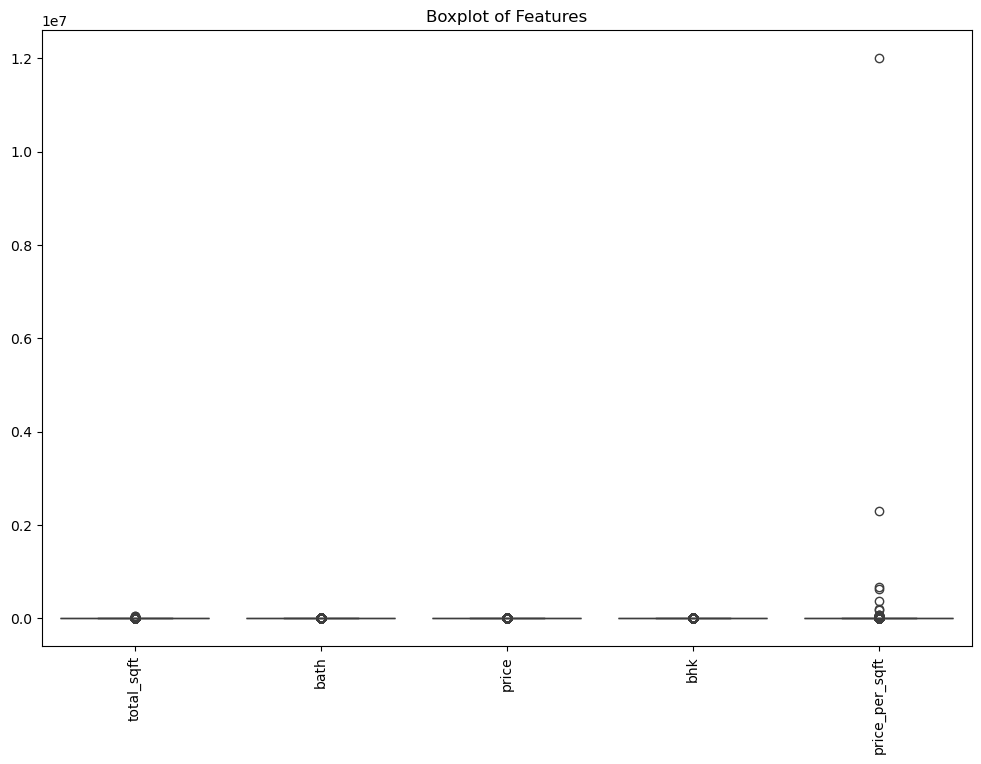

In [17]:
# Boxplot of each column
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show() 

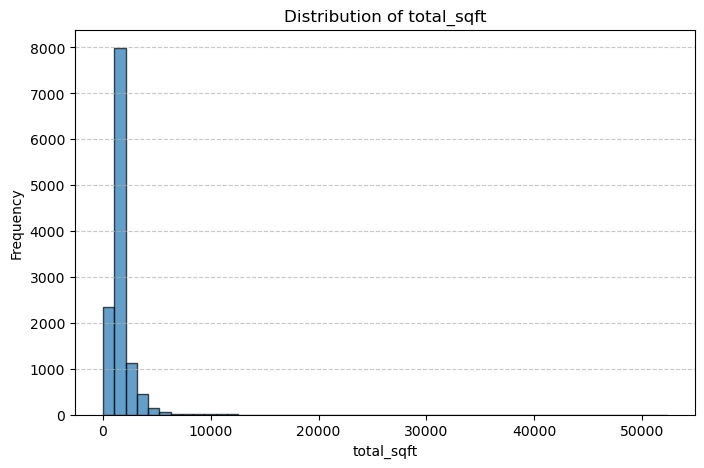

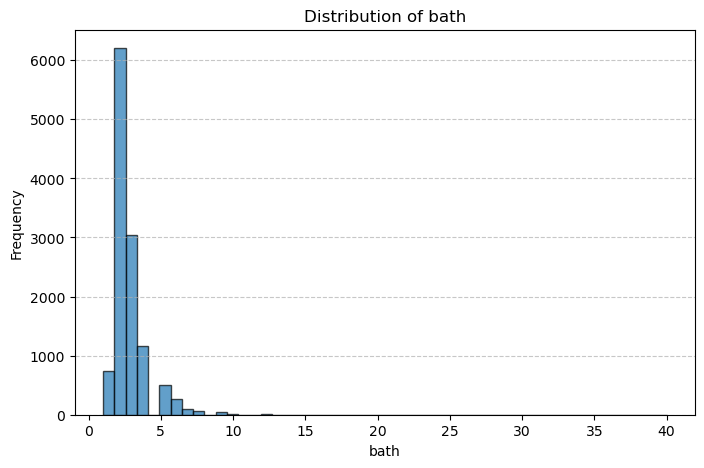

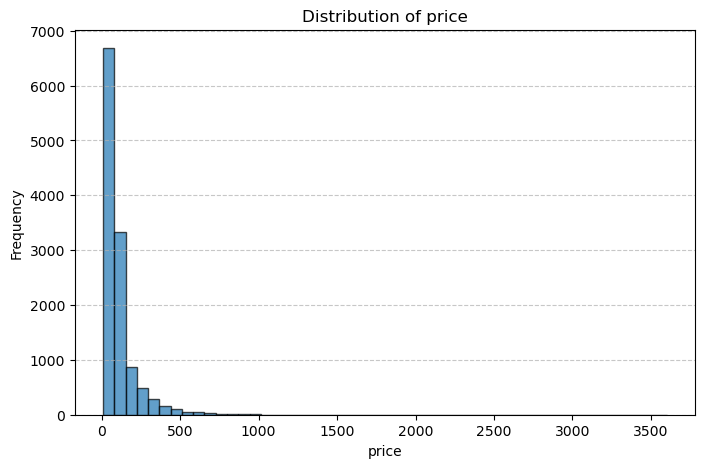

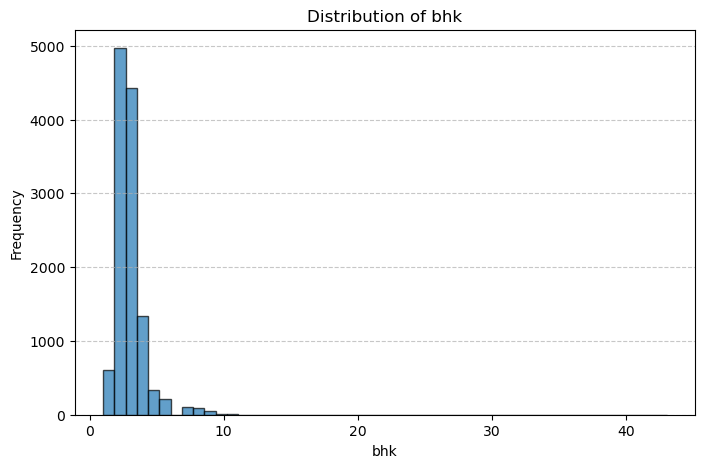

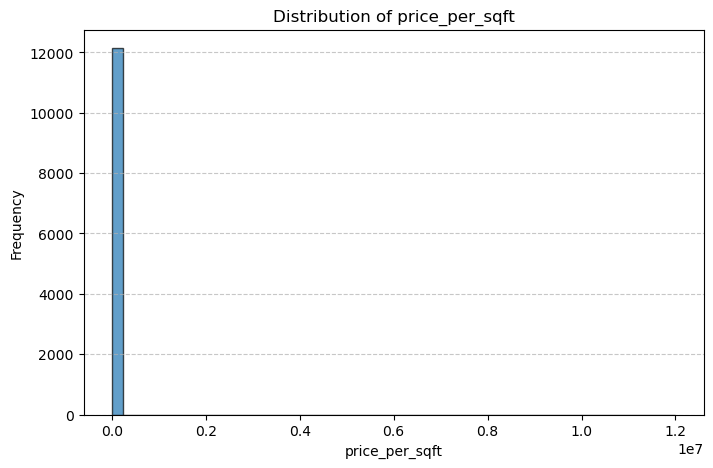

In [18]:
numeric_cols = ["total_sqft", "bath", "price", "bhk", "price_per_sqft"]

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=50, edgecolor="black", alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method

In [19]:
num_cols = ["total_sqft", "bath", "price", "bhk", "price_per_sqft"]

df_cap_mean_std = df.copy()

outliers_removed = {}

for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_removed[col] = num_outliers
    print(f"{col}: {num_outliers} outliers detected")

    df_cap_mean_std[col] = np.clip(df_cap_mean_std[col], lower_bound, upper_bound)
df_cap_mean_std

total_sqft: 106 outliers detected
bath: 238 outliers detected
price: 185 outliers detected
bhk: 264 outliers detected
price_per_sqft: 5 outliers detected


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0,6530.0
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4.0,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.0


In [20]:
df_cap_percentile = df.copy()

outliers_removed = {}

for col in num_cols:
    lower_bound = np.percentile(df[col], 1)
    upper_bound = np.percentile(df[col], 99)

    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_removed[col] = num_outliers
    print(f"{col}: {num_outliers} outliers detected")

    df_cap_percentile[col] = np.clip(df_cap_percentile[col], lower_bound, upper_bound)
df_cap_percentile

total_sqft: 238 outliers detected
bath: 73 outliers detected
price: 239 outliers detected
bhk: 78 outliers detected
price_per_sqft: 243 outliers detected


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [21]:
df_trim_iqr = df.copy()

outliers_removed = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1                
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  

    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_removed[col] = num_outliers 
    print(f"{col}: {num_outliers} outliers detected")

    df_trim_iqr = df_trim_iqr[(df_trim_iqr[col] >= lower_bound) & (df_trim_iqr[col] <= upper_bound)]
df_trim_iqr

total_sqft: 1069 outliers detected
bath: 1009 outliers detected
price: 1165 outliers detected
bhk: 821 outliers detected
price_per_sqft: 1142 outliers detected


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
...,...,...,...,...,...,...,...
13189,Yeshwanthpur,3 BHK,1675.0,3.0,92.13,3,5500
13190,Rachenahalli,2 BHK,1050.0,2.0,52.71,2,5020
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530


In [22]:
from scipy import stats

df_impute_zscore = df.copy()

outliers_removed = {}

for col in num_cols:
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)

    num_outliers = (abs_z_scores > 3).sum()
    outliers_removed[col] = num_outliers
    print(f"{col}: {num_outliers} outliers detected")

    mean_value = df[col].mean()
    df_impute_zscore.loc[abs_z_scores > 3, col] = mean_value
df_impute_zscore

total_sqft: 106 outliers detected
bath: 238 outliers detected
price: 185 outliers detected
bhk: 264 outliers detected
price_per_sqft: 5 outliers detected


C:\Users\Syamkumar-CSSIT\AppData\Local\Temp\ipykernel_1672\928400136.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.8275039091432803' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_impute_zscore.loc[abs_z_scores > 3, col] = mean_value
C:\Users\Syamkumar-CSSIT\AppData\Local\Temp\ipykernel_1672\928400136.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8132.641840177763' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_impute_zscore.loc[abs_z_scores > 3, col] = mean_value


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0,6530.0
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4.0,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.0


Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

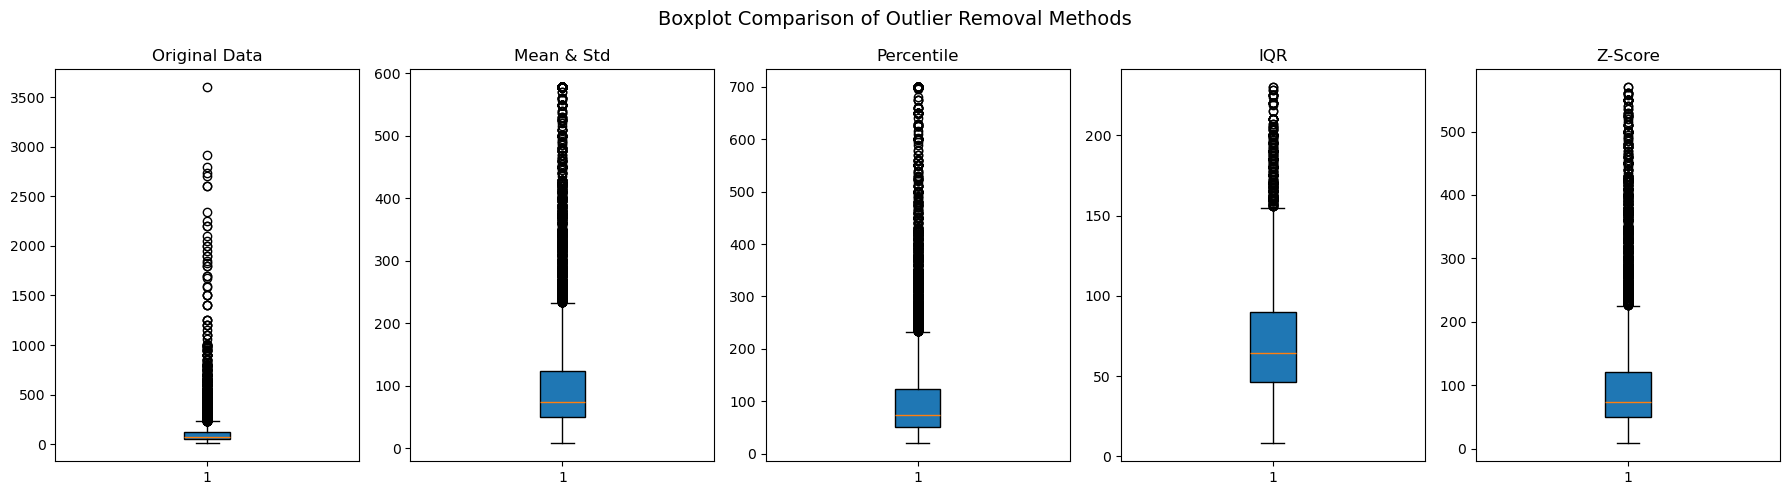

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5))
fig.suptitle("Boxplot Comparison of Outlier Removal Methods", fontsize=14)

datasets = {"Original Data": df,"Mean & Std": df_cap_mean_std,"Percentile": df_cap_percentile,"IQR": df_trim_iqr,"Z-Score": df_impute_zscore}

for i, (name, dataset) in enumerate(datasets.items()):
    axes[i].boxplot(dataset["price"], vert=True, patch_artist=True)
    axes[i].set_title(name)

plt.tight_layout()
plt.show()

# IOR seems to work better


Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Syamkumar-CSSIT\AppData\Local\Temp\ipykernel_1672\3398795895.py:6: SyntaxWarning: invalid escape sequence '\d'
  df["size"] = df["size"].str.extract("(\d+)").astype(float)


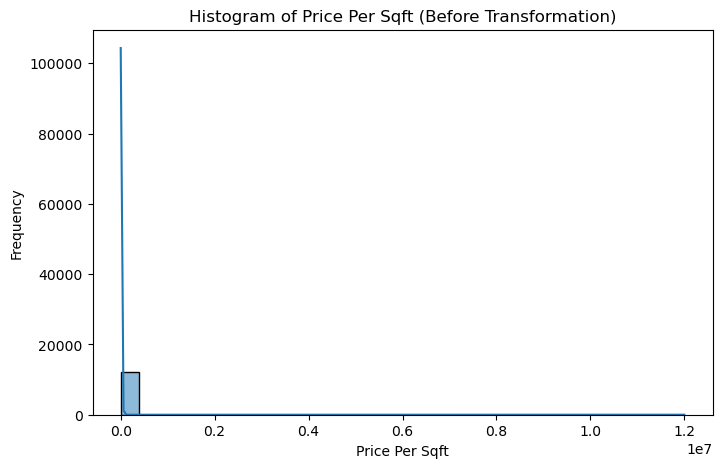

Skewness Before Transformation: 103.8892
Kurtosis Before Transformation: 11131.2308


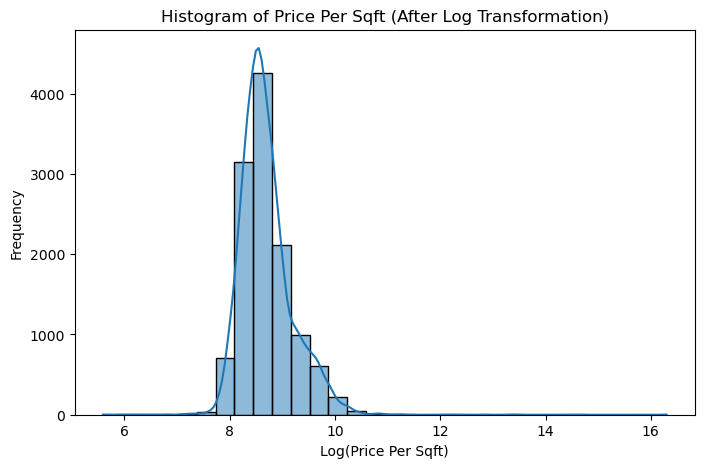

Skewness After Transformation: 1.4009
Kurtosis After Transformation: 9.4044


In [25]:
column = "price_per_sqft"

df = df.drop(columns=["location"], errors="ignore")

if "size" in df.columns and df["size"].dtype == "object":
    df["size"] = df["size"].str.extract("(\d+)").astype(float)

df = df.dropna(subset=[column])

# Histogram plot before transformation
plt.figure(figsize=(8, 5))
sns.histplot(df[column], bins=30, kde=True)
plt.title("Histogram of Price Per Sqft (Before Transformation)")
plt.xlabel("Price Per Sqft")
plt.ylabel("Frequency")
plt.show()

# Skewness and Kurtosis before transformation
skew_before = skew(df[column])
kurtosis_before = kurtosis(df[column])
print(f"Skewness Before Transformation: {skew_before:.4f}")
print(f"Kurtosis Before Transformation: {kurtosis_before:.4f}")

# Log transformation
df["price_per_sqft_log"] = np.log1p(df[column])

# Histogram plot after transformation
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft_log"], bins=30, kde=True)
plt.title("Histogram of Price Per Sqft (After Log Transformation)")
plt.xlabel("Log(Price Per Sqft)")
plt.ylabel("Frequency")
plt.show()

# Skewness and Kurtosis after transformation
skew_after = skew(df["price_per_sqft_log"])
kurtosis_after = kurtosis(df["price_per_sqft_log"])
print(f"Skewness After Transformation: {skew_after:.4f}")
print(f"Kurtosis After Transformation: {kurtosis_after:.4f}")

Q5. Check the correlation between all the numerical columns and plot heatmap.

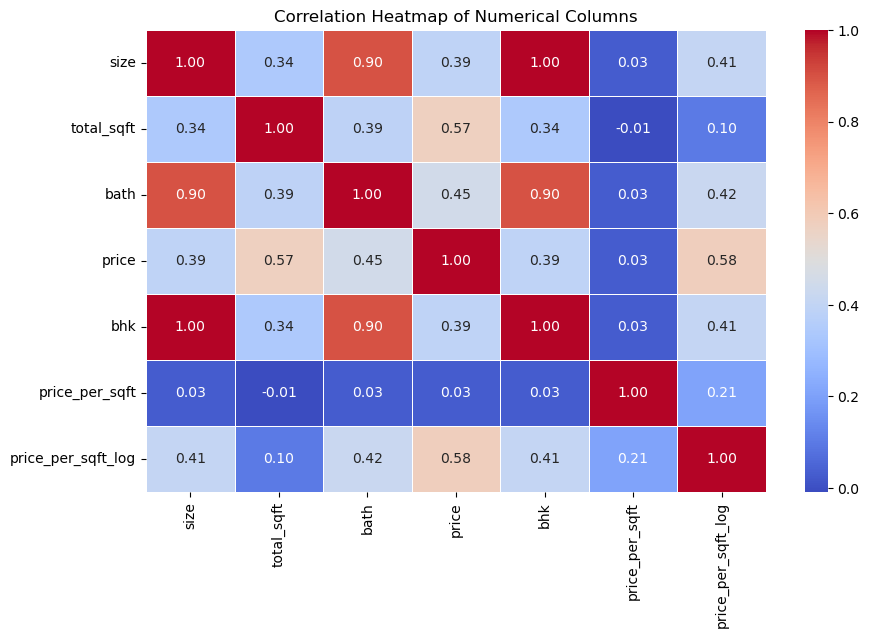

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

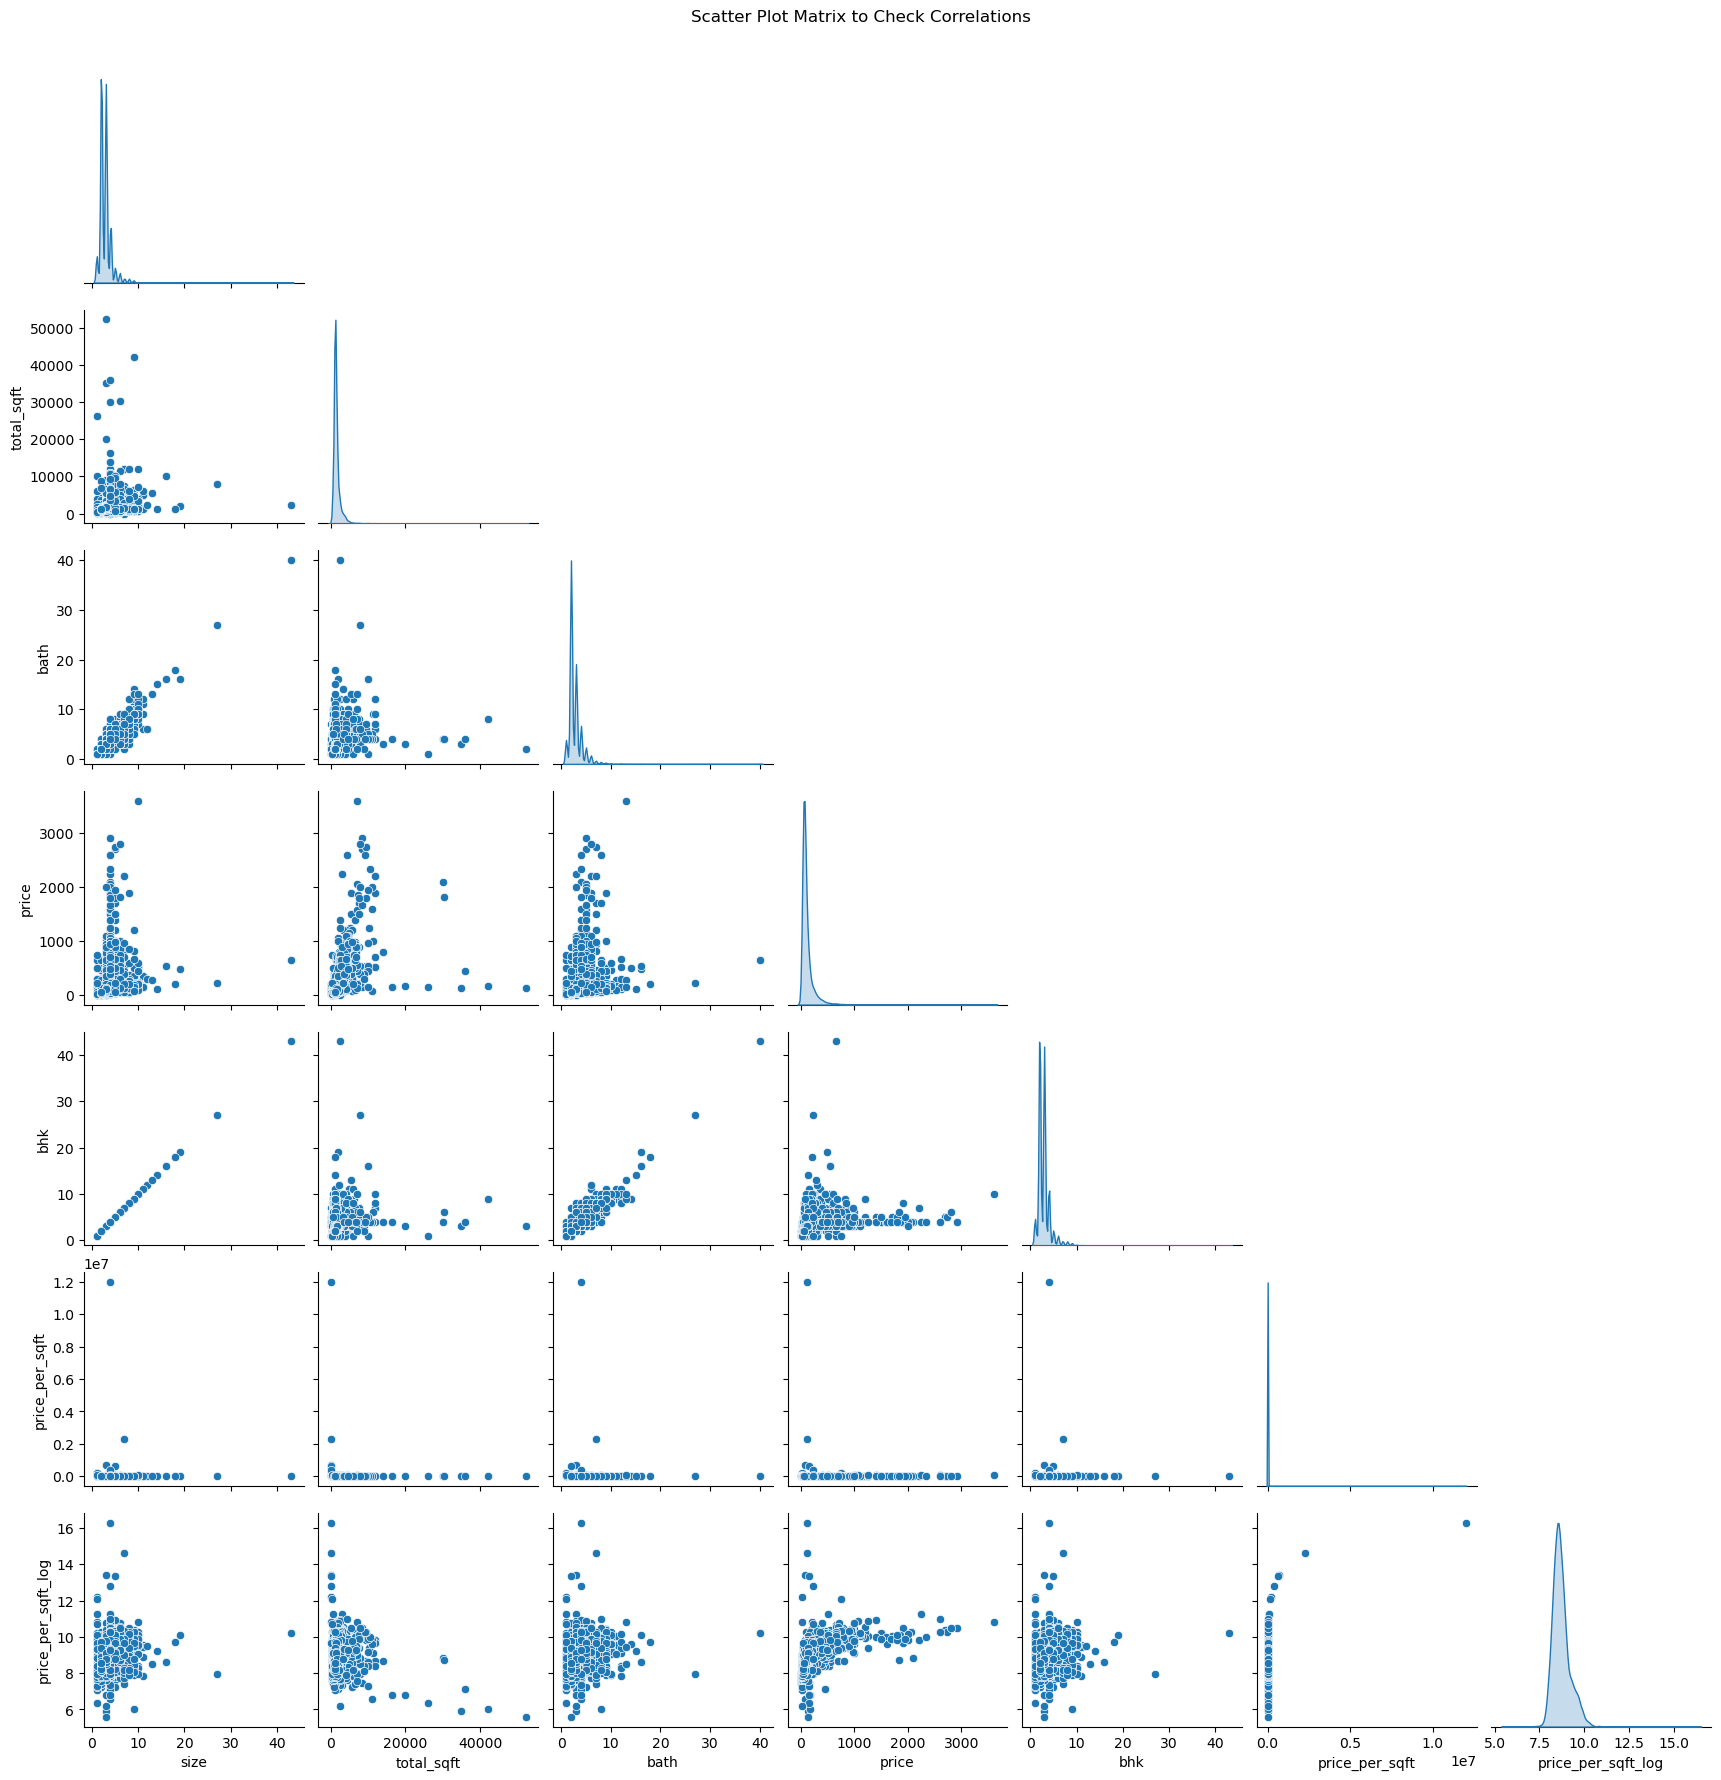

In [28]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Scatter Plot Matrix to Check Correlations", y=1.02)
plt.show()